In [3]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [4]:
log_data=pd.read_csv('../Datas/log4.csv',header=None)

In [5]:
log_data

,0,1,2,3
0,roadkillstatus,1592058252564,2451238500,...
1,research2,1592058256043,46586900,...
2,busanmovie13,1592058256261,264503400,...
3,busanmovie5,1592058256666,29178500,...
4,busanmovie2,1592058256851,38638700,...
...,...,...,...,...
18795,TouristAtt,1592061570528,36693600,...
18796,ThemeTour_Subway,1592061570690,31064100,...
18797,research2,1592061570867,31363000,...
18798,research10,1592061571022,29779100,...


In [6]:
log_data.columns=['Dataset','Query Time','Execution Time','ManagerId']

In [7]:
log_data.info

<bound method DataFrame.info of                 Dataset     Query Time  Execution Time ManagerId
0        roadkillstatus  1592058252564      2451238500       ...
1             research2  1592058256043        46586900       ...
2          busanmovie13  1592058256261       264503400       ...
3           busanmovie5  1592058256666        29178500       ...
4           busanmovie2  1592058256851        38638700       ...
...                 ...            ...             ...       ...
18795        TouristAtt  1592061570528        36693600       ...
18796  ThemeTour_Subway  1592061570690        31064100       ...
18797         research2  1592061570867        31363000       ...
18798        research10  1592061571022        29779100       ...
18799         research5  1592061571178        28255400       ...

[18800 rows x 4 columns]>

In [8]:
log_data.describe()

,Query Time,Execution Time
count,1.880000e+04,1.880000e+04
mean,1.592060e+12,3.596896e+07
std,9.601152e+05,4.605090e+07
min,1.592058e+12,1.802540e+07
25%,1.592059e+12,2.605915e+07
50%,1.592060e+12,2.866610e+07
75%,1.592061e+12,3.082942e+07
max,1.592062e+12,2.728199e+09


In [9]:
X=log_data[['Dataset','Query Time','Execution Time']]

In [10]:
X

,Dataset,Query Time,Execution Time
0,roadkillstatus,1592058252564,2451238500
1,research2,1592058256043,46586900
2,busanmovie13,1592058256261,264503400
3,busanmovie5,1592058256666,29178500
4,busanmovie2,1592058256851,38638700
...,...,...,...
18795,TouristAtt,1592061570528,36693600
18796,ThemeTour_Subway,1592061570690,31064100
18797,research2,1592061570867,31363000
18798,research10,1592061571022,29779100


In [11]:
X.describe()

,Query Time,Execution Time
count,1.880000e+04,1.880000e+04
mean,1.592060e+12,3.596896e+07
std,9.601152e+05,4.605090e+07
min,1.592058e+12,1.802540e+07
25%,1.592059e+12,2.605915e+07
50%,1.592060e+12,2.866610e+07
75%,1.592061e+12,3.082942e+07
max,1.592062e+12,2.728199e+09


In [12]:
execute_mean=X[['Execution Time']].mean()
execute_std=X[['Execution Time']].std()
X[['Execution Time']]=(X[['Execution Time']]-execute_mean)/execute_std * 10

C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
query_mean=X[['Query Time']].mean()
query_std=X[['Query Time']].std()
X[['Query Time']]=(X[['Query Time']]-query_mean)/query_std

In [14]:
outliar_removed_index=X[X[['Execution Time']]<2]['Execution Time'].dropna().index
X=X.iloc[outliar_removed_index]

In [15]:
Dataset_Query=X.groupby('Dataset')['Query Time'].mean().to_frame().reset_index()

In [16]:
Dataset_Execution=X.groupby('Dataset')['Execution Time'].mean().to_frame().reset_index()

In [17]:
Dataset_Query_Frequency=X.groupby('Dataset')['Query Time'].count().to_frame().reset_index()
Dataset_Query_Frequency.rename(columns = {'Query Time' : 'Query Count'}, inplace = True)

In [18]:
X=pd.merge(Dataset_Query,Dataset_Execution,on='Dataset')
X=pd.merge(X,Dataset_Query_Frequency,on='Dataset')

In [19]:
count_mean=X[['Query Count']].mean()
count_std=X[['Query Count']].std()
X[['Query Count']]=(X[['Query Count']]-count_mean)/count_std

In [20]:
X

,Dataset,Query Time,Execution Time,Query Count
0,CinemaMap,0.115276,-1.764432,-0.780450
1,Cinemap,-0.100628,-1.018976,-0.610090
2,CulturalAssets,-0.112342,0.408128,-0.595893
3,DureraumMovie3,0.251200,-0.945762,-0.832505
4,DureraumMovie4,-0.154003,-1.773979,-0.780450
...,...,...,...,...
85,research9,0.060087,-1.925823,1.268607
86,roadkillstatus,-0.000113,-1.744095,1.784420
87,roadkillstatus1,-0.016978,-1.738817,1.770223
88,tourguide,0.025619,-1.293794,0.894760


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7CDD0B488>]],
      dtype=object)

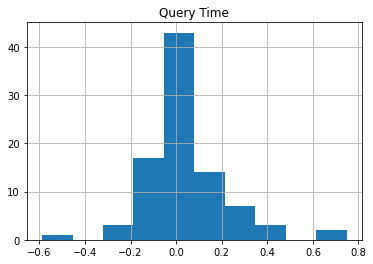

In [21]:
X[['Query Time']].hist()

In [22]:
hot_execution_index=X[X[['Execution Time']]>X[['Execution Time']].mean()]['Execution Time'].dropna().index

In [23]:
hot_execution_index

Int64Index([ 1,  2,  3,  5,  6,  7, 17, 18, 19, 23, 24, 25, 26, 30, 31, 32, 34,
            38, 39, 41, 55, 72, 73, 88, 89],
           dtype='int64')

In [24]:
hot_query_index=X[X[['Query Time']]>X[['Query Time']].mean()]['Query Time'].dropna().index

In [25]:
hot_query_index

Int64Index([ 0,  3,  9, 10, 11, 14, 15, 16, 17, 18, 19, 21, 25, 29, 31, 32, 36,
            37, 39, 40, 41, 50, 52, 55, 57, 59, 60, 61, 62, 65, 66, 68, 69, 70,
            76, 77, 84, 85],
           dtype='int64')

In [26]:
hot_count_index=X[X[['Query Count']]>X[['Query Count']].mean()]['Query Count'].dropna().index

In [27]:
hot_count_index

Int64Index([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 72, 73,
            74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
           dtype='int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7CE121848>]],
      dtype=object)

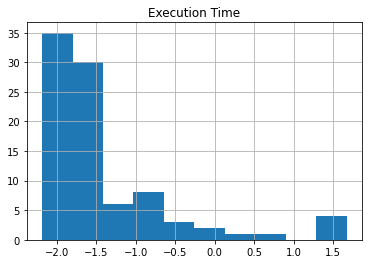

In [28]:
X[['Execution Time']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7CE165908>]],
      dtype=object)

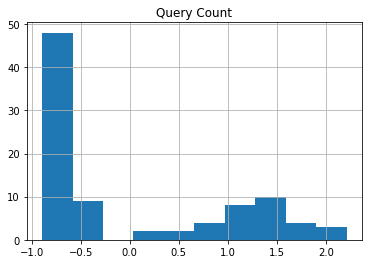

In [29]:
X[['Query Count']].hist()

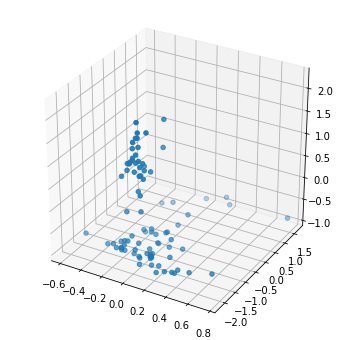

In [30]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[["Query Time"]],X[["Execution Time"]],X[["Query Count"]])
plt.show()

In [32]:
X

,Dataset,Query Time,Execution Time,Query Count
0,CinemaMap,0.115276,-1.764432,-0.780450
1,Cinemap,-0.100628,-1.018976,-0.610090
2,CulturalAssets,-0.112342,0.408128,-0.595893
3,DureraumMovie3,0.251200,-0.945762,-0.832505
4,DureraumMovie4,-0.154003,-1.773979,-0.780450
...,...,...,...,...
85,research9,0.060087,-1.925823,1.268607
86,roadkillstatus,-0.000113,-1.744095,1.784420
87,roadkillstatus1,-0.016978,-1.738817,1.770223
88,tourguide,0.025619,-1.293794,0.894760


In [33]:
Train_X=X[["Query Time", "Execution Time", "Query Count"]]

{0, -1}
[ 0 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0  0  0  0  0 -1 -1 -1  0  0  0 -1
 -1 -1 -1  0  0  0 -1 -1 -1  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


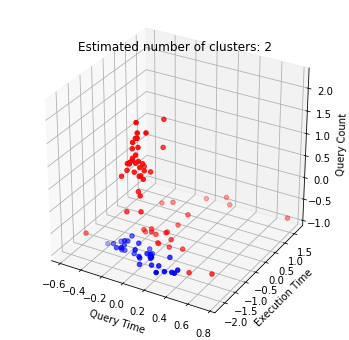

In [80]:
db = DBSCAN(eps=0.3, min_samples=17).fit(Train_X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(set(labels))
n_clusters_ = len(set(labels))
print(labels)

groups={}

for label in set(labels):
    groups[label]=[];

for index in range(len(Train_X)):
    groups[labels[index]].append(index) 

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
color=['b','r','g']
for index, group in enumerate(groups.values()):
    xy=Train_X.loc[group]
    ax.scatter(xy[["Query Time"]],xy[["Execution Time"]],xy[["Query Count"]], 'o',c=color[index])

    
ax.set_xlabel("Query Time");
ax.set_ylabel("Execution Time");
ax.set_zlabel("Query Count");
ax.set_title("K-means result");
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()